In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Generative Learning Algorithms
## 1. Gaussian Discriminant Anlysis
## 2. Naive Bayes


## Generative Learning Algorithms
Discriminative Model: Learns P(y|x) \
Generative Model: Learns P(x|y) \
→ Bayes Rule:
$$
p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x)}  
$$

$$
p(x) = p(x|y=1)p(y=1) + p(x|y=0)p(y=0)
$$


##Gaussian Discriminant Analysis
Assume $p(x|y)$  is Gaussian → multivariative Gaussian($\mu \in ℝ^n, \Sigma \in ℝ^{n× n}$)

- Three Assumptions: Gaussian, Gaussian, Bernoulli(phi: probability of y=1)

$$
P(x|y=0) = f(\mathbf{x} | \boldsymbol{\mu_0}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^n |\boldsymbol{\Sigma}|}} \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu_0})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu_0})\right)
$$

$$
P(x|y=1) = f(\mathbf{x} | \boldsymbol{\mu_1}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^n |\boldsymbol{\Sigma}|}} \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu_1})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu_1})\right)
$$

$$
p(y) = \phi^y(1-\phi)^{1-y}, \quad p(y=1)=\phi,\quad \phi \in ℝ
$$

- Normally use same covariance → because, decision boundary becomes linear this way

- Likelihood Function: **Joint Likelihood**
$$
L(\phi,\mu_0,\mu_1,\Sigma) = \prod_{i=1}^mp(x^{(i)},y^{(i)}; \phi,\mu_0,\mu_1,\Sigma) = \prod_{i=1}^mp(x^{(i)}|y^{(i)})p(y^{(i)}) \\
l(\phi,\mu_0,\mu_1,\Sigma) = \sum_{i=1}^m \log p(x^{(i)}|y^{(i)})p(y^{(i)})
$$
→ Parital Derivation
$$
\frac{\partial l}{\partial \phi} = 0 \implies \phi = \frac{1}{m} \sum_{i=1}^{m} 𝟙\{y^{(i)} = 1\} \\
\nabla_{\mu_0} l = 0 \implies \mu_0 = \frac{\sum_{i=1}^{m} 𝟙\{y^{(i)}=0\} x^{(i)}}{\sum_{i=1}^{m} 𝟙\{y^{(i)}=0\}}\\
\nabla_{\mu_1} l = 0 \implies \mu_1 = \frac{\sum_{i=1}^{m} 𝟙\{y^{(i)}=1\} x^{(i)}}{\sum_{i=1}^{m} 𝟙\{y^{(i)}=1\}} \\
\nabla_{\Sigma} l = 0 \implies \Sigma = \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T
$$

- Prediction
$$ \text{argmax}[p(y|x)] =  \text{argmax}[\frac {p(x|y)p(y)}{p(x)}] = \text{argmax}[ {p(x|y)p(y)}]
$$


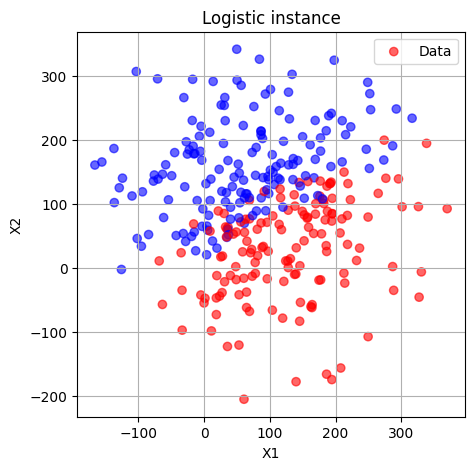

In [ ]:
np.random.seed(0)
N = 300
X = 100 * np.random.randn(N, 2) + 100
Y = X @ np.array([[-1],[2]]) + 200 * np.random.rand(N,1) > 200

plt.figure(figsize=(5, 5))
colors = np.where(Y.flatten() == True, 'b', 'r')
plt.scatter(X[:,0], X[:,1], c=colors, label='Data', alpha=0.6)
plt.title('Logistic instance')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def gaussian_discriminant_analysis(X_train, Y_train):
    m = X_train.shape[0]
    phi = np.mean(Y_train)

    Y_tile = np.tile(Y_train,(1,2))
    mu_1 = np.sum(X_train * Y_tile, 0) / np.sum(Y_tile, 0)
    mu_0 = np.sum(X_train * (1 - Y_tile), 0) / np.sum(1 - Y_tile, 0)
    mu_y = mu_1 * Y_train + mu_0 * (1 - Y_train)
    cov = np.zeros((2,2))
    for i in range(m):
        temp = (X_train[i] - mu_y[i]).reshape(1,2)
        cov += temp.T @ temp

    cov /= m
    return phi, mu_0, mu_1, cov

phi, mu_0, mu_1, cov = gaussian_discriminant_analysis(X_train,Y_train)

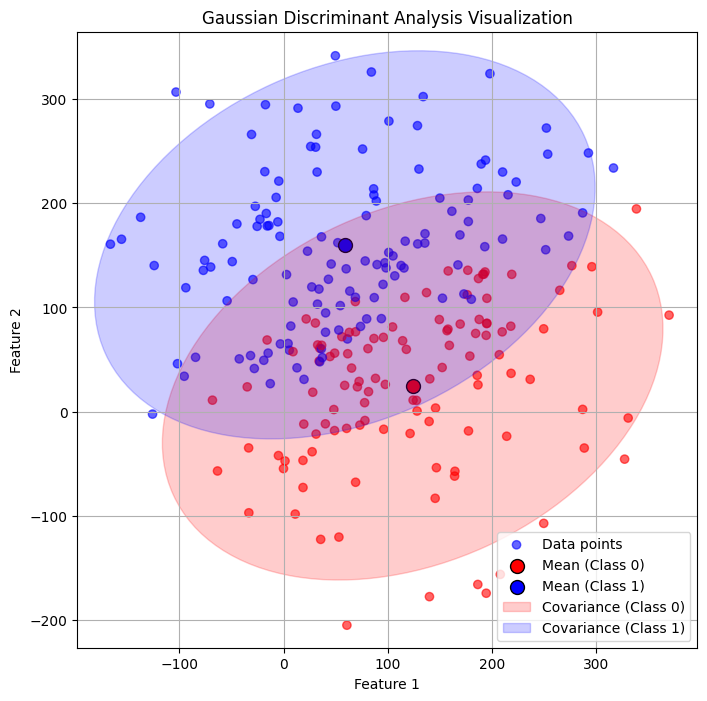

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import chi2

# Function to draw an ellipse representing a multivariate Gaussian distribution
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draws an ellipse representing a multivariate Gaussian distribution."""
    ax = ax or plt.gca()

    # Convert covariance to principal axes for ellipse plotting
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        raise ValueError("Covariance must be 2D.")

    # Confidence interval for 95%
    # For a 2D Gaussian, the Mahalanobis distance squared follows a chi-squared distribution with 2 degrees of freedom.
    # The value for 95% confidence is chi2.ppf(0.95, 2)
    confidence_level = 0.95
    scale_factor = np.sqrt(chi2.ppf(confidence_level, 2))

    ellipse = Ellipse(position, width=scale_factor * width, height=scale_factor * height,
                      angle=angle, **kwargs)
    return ax.add_patch(ellipse)


# Plotting
plt.figure(figsize=(8, 8))

# Plot data points
colors = np.where(Y_train.flatten() == True, 'b', 'r')
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, alpha=0.6, label='Data points')

# Plot means
plt.scatter(mu_0[0], mu_0[1], c='r', marker='o', s=100, edgecolors='k', label='Mean (Class 0)')
plt.scatter(mu_1[0], mu_1[1], c='b', marker='o', s=100, edgecolors='k', label='Mean (Class 1)')

# Draw covariance ellipses
draw_ellipse(mu_0, cov, ax=plt.gca(), alpha=0.2, color='red', label='Covariance (Class 0)')
draw_ellipse(mu_1, cov, ax=plt.gca(), alpha=0.2, color='blue', label='Covariance (Class 1)')


plt.title('Gaussian Discriminant Analysis Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal') # Ensure circles/ellipses are not distorted
plt.show()

## Naive Bayes
- Generative Learning Algorithm (same to GDA) but with Assumption!

- Assumption: $x_i$s are **conditionally independent**. (very Naive)
$$
 P(x_1,\cdots,x_n|y) = P(x_1|y)P(x_2|x_1,y)P(x_3|x_1,x_2,y)\cdots P(x_n|\cdots) ≈ P(x_1|y)P(x_2|y)\cdots P(x_n|y) \\ = \prod_{j=1}^{n} P(x_j|y)
$$

- No Correlation between features -> Covariance is diagonal matrix

- Can deal with data with many features.

- Type of data : continuous data (Gaussian NB), counts (Multinomial NB), binary (Bernoulli NB)

- (Not) Joint likelihood : Just multiply each x's probability.
$$\prod_{j=1}^{n} P(x_j|y) $$
- (For Bernoulli NB)
$$
\phi_y = \frac{\sum_{i=1}^m 𝟙[y^{(i)}=1]}{m} \quad \phi_{j|y=1} = \frac{\sum_{i=1}^m𝟙[x_j^{(i)}=1, y^{(i)}=1]} {\sum_{i=1}^m𝟙[y^{(i)}=1]} \quad
\phi_{j|y=0} = \frac{\sum_{i=0}^m𝟙[x_j^{(i)}=1, y^{(i)}=0]} {\sum_{i=0}^m𝟙[y^{(i)}0]}
$$

- To prediction compare $P(y=1|x)$ and $P(y=0|x)$ (Same to GDA)

In [ ]:
np.random.seed(0)
N = 100
features = 100
X = np.random.randint(0, 2, (N, features))
Y = X[:, 3] + X[:,10] + 2*X[:, 13] + X[:, 35] + 3*X[:,89] + X[:,98] + np.random.randint(0,3) > 5

print(X)
print(Y)
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

[[0 1 1 ... 1 1 0]
 [1 0 0 ... 1 0 0]
 [1 0 1 ... 0 1 1]
 ...
 [1 0 1 ... 1 1 1]
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 0 1 0]]
[ True False  True  True  True False  True False False False  True  True
  True  True  True False  True False False  True False  True  True False
  True  True False  True  True  True False False  True False False False
 False False  True  True False  True  True  True  True False False  True
  True False False False False  True  True False  True  True  True  True
  True False  True False  True  True  True False False False False  True
  True  True  True  True  True False  True  True  True False  True  True
 False  True  True  True False False False False  True  True False  True
 False  True  True  True]


In [ ]:
from sklearn.metrics import accuracy_score

def bernoulli_naive_bayes(X_train, Y_train):
    n_samples, n_features = X_train.shape
    Y_train_flat = Y_train.flatten() # Flatten Y_train for boolean indexing

    # phi_y = P(y=1)
    phi_y = np.sum(Y_train_flat) / n_samples

    # Separate data by class
    X_train_y1 = X_train[Y_train_flat == 1]
    X_train_y0 = X_train[Y_train_flat == 0]

    # Calculate counts for each class
    count_y1 = X_train_y1.shape[0]
    count_y0 = X_train_y0.shape[0]

    # Laplace smoothing parameter (add-1 smoothing)
    alpha = 1

    # phi_x_y1 = P(x_j=1 | y=1)
    phi_x_y1 = (np.sum(X_train_y1, axis=0) + alpha) / (count_y1 + 2 * alpha)

    # phi_x_y0 = P(x_j=1 | y=0)
    phi_x_y0 = (np.sum(X_train_y0, axis=0) + alpha) / (count_y0 + 2 * alpha)

    # Ensure probabilities are 2D arrays (1, n_features)
    phi_x_y1 = phi_x_y1.reshape(1, -1)
    phi_x_y0 = phi_x_y0.reshape(1, -1)

    return phi_y, phi_x_y1, phi_x_y0

def predict_bernoulli_naive_bayes(prob_y, prob_x_y1, prob_x_y0, test_X):
    eps = 1e-9 # Epsilon for log calculations if smoothing isn't perfect or P is exactly 0/1

    # Calculate log likelihood for class 1
    log_likelihood_1 = np.sum(
        test_X * np.log(prob_x_y1 + eps) +
        (1 - test_X) * np.log(1 - prob_x_y1 + eps),
        axis=1
    )
    score_1 = log_likelihood_1 + np.log(prob_y + eps)

    # Calculate log likelihood for class 0
    log_likelihood_0 = np.sum(
        test_X * np.log(prob_x_y0 + eps) +
        (1 - test_X) * np.log(1 - prob_x_y0 + eps),
        axis=1
    )
    score_0 = log_likelihood_0 + np.log(1 - prob_y + eps)

    predictions = np.where(score_1 > score_0, 1, 0)
    return predictions


phi_y, phi_x_y1, phi_x_y0 = bernoulli_naive_bayes(X_train, Y_train)
predictions = predict_bernoulli_naive_bayes(phi_y, phi_x_y1, phi_x_y0, X_test)
print(f"Predictions: {predictions}")
print(f"True Labels: {Y_test.flatten()}")
accuracy = accuracy_score(Y_test.flatten(), predictions)
print(f"Accuracy: {accuracy:.4f}")

Predictions: [1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1]
True Labels: [ True  True False False  True  True  True  True  True  True False False
  True False False  True  True False  True False]
Accuracy: 0.6500
